In [1]:
%pip install mne
%pip install pandas
%pip install numpy
%pip install glob2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import mne
import glob
from tqdm import tqdm

from EegHelper.EegData import EegDataPoint, EegDataset, files_to_datapoints

import matplotlib.pyplot as plt

%matplotlib inline

#Following two are so that external files are auto loaded after edit
%load_ext autoreload
%autoreload 2
#mne outputs so much stuff, so just set log level
mne.set_log_level('error')

In [3]:
files = glob.glob('./MindBigData-EP-v1.0/*.csv')
all_points, all_labels = files_to_datapoints(files, first_n=len(files)) #first_n = 500 by default. Apply first_n = len(files) to load all

Loading epoc data...


100%|██████████| 65034/65034 [06:15<00:00, 173.10it/s]


In [15]:
ch_names = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
num_list = []
for i in range(0,10):
    l1 = np.ndarray(shape=(0,0))
    num_list.append([l1 for i in range(14)])

for i, value in enumerate(tqdm(all_points)):
    for y, ch_value in enumerate(ch_names):
        label = int(all_points[i].label)
        num_list[label][y] = np.append(num_list[label][y], all_points[i].mne_object.get_data()[y])

# for i, value in enumerate(ch_names):
#     print('mean '+ value + ' = ' + str(np.mean(mean_list[i])))
#     print('std '+ value + ' = ' + str(np.std(std_list[i])) + '\n')

# plt.plot(all_points[i].mne_object.get_data())
# plt.show()
# all_points[i].mne_object.plot(scalings='auto')

# sklearn T tests

100%|██████████| 64629/64629 [23:14<00:00, 46.35it/s] 


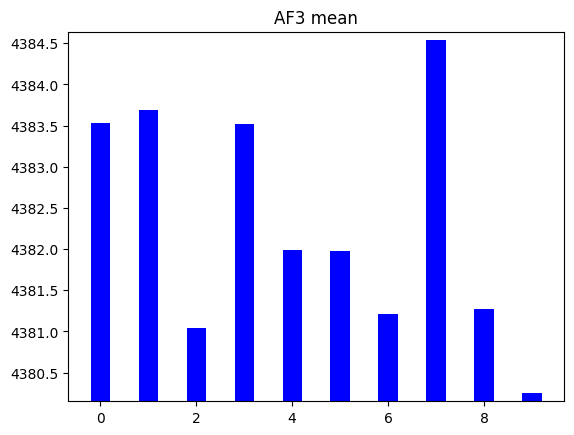

C:\Users\Ivan\AppData\Local\Temp\ipykernel_29764\3750853680.py:36: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min(deviations), max(deviations))


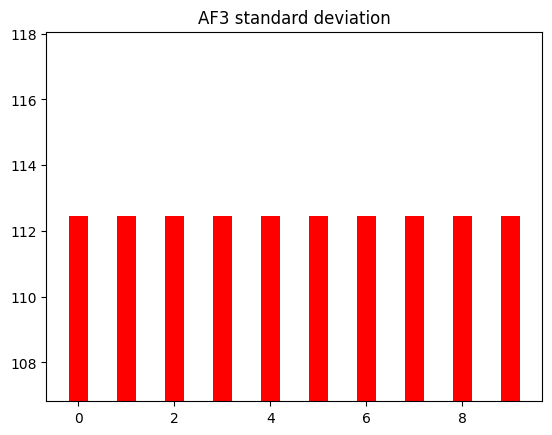

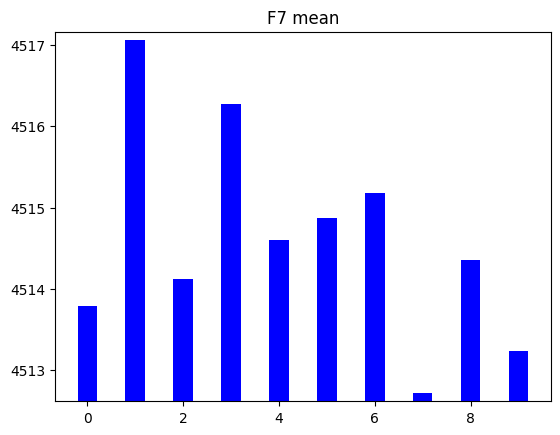

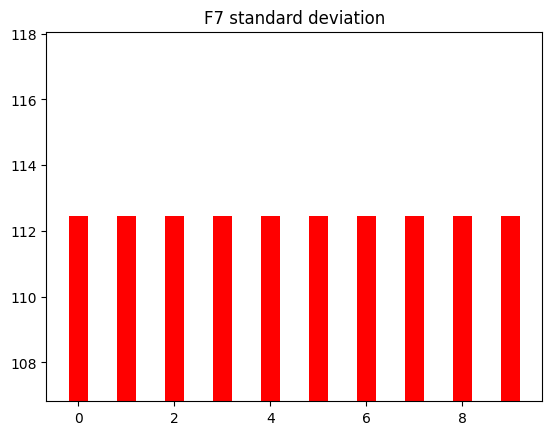

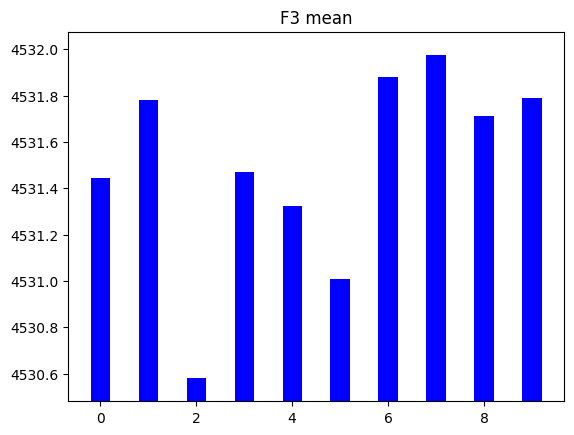

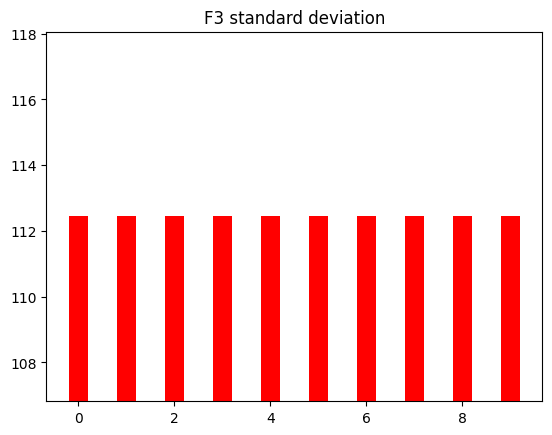

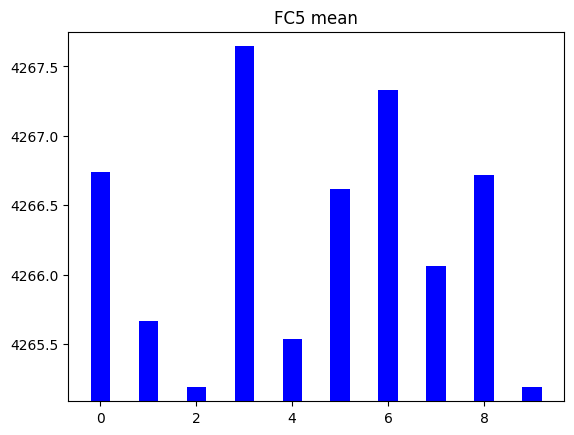

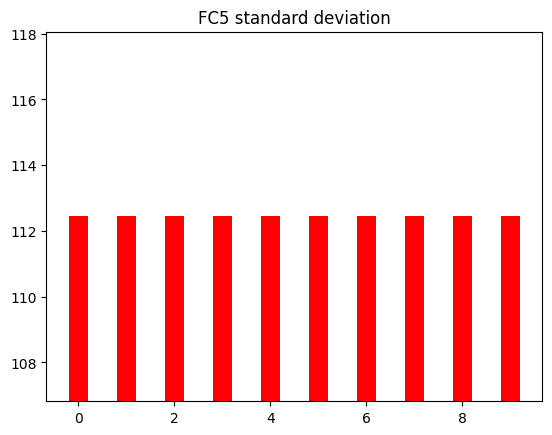

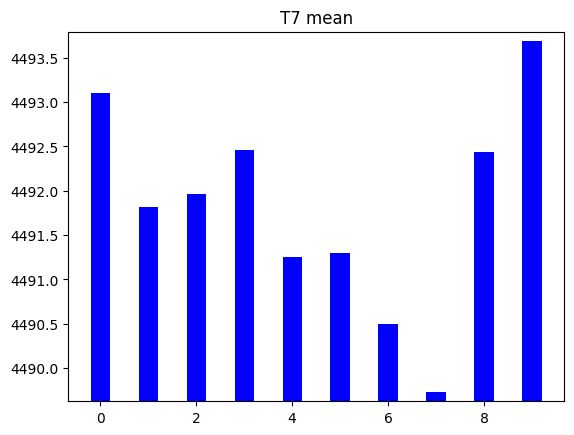

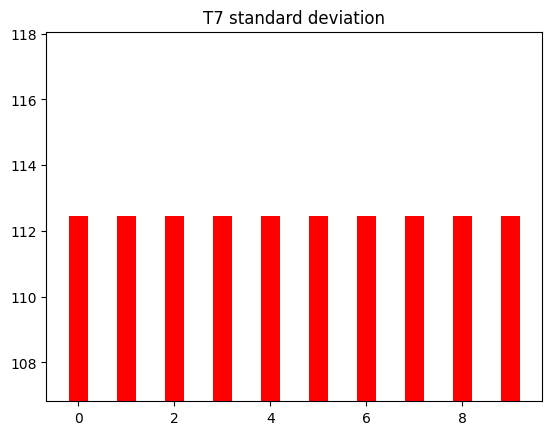

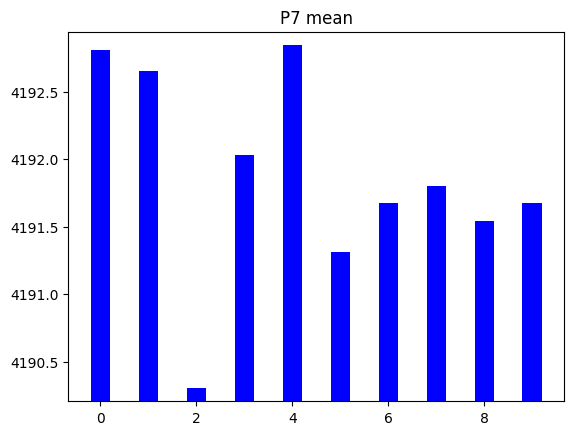

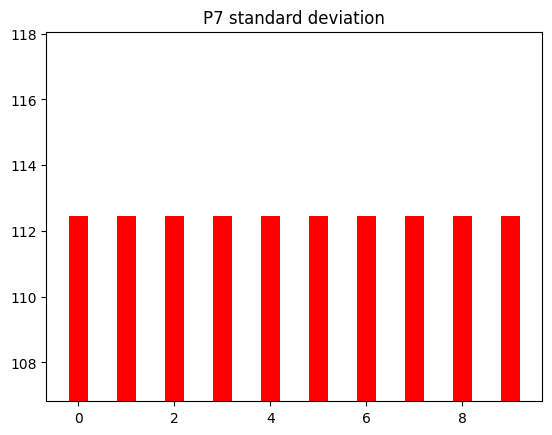

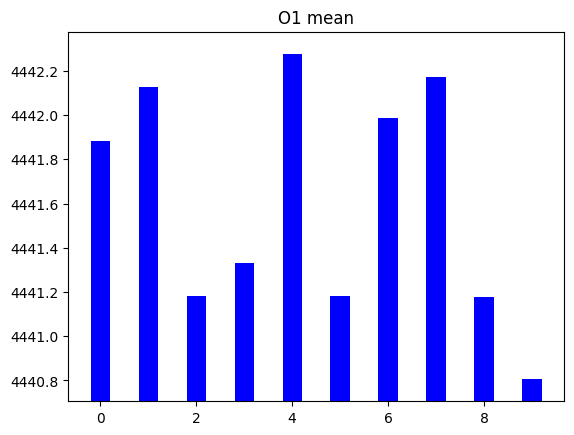

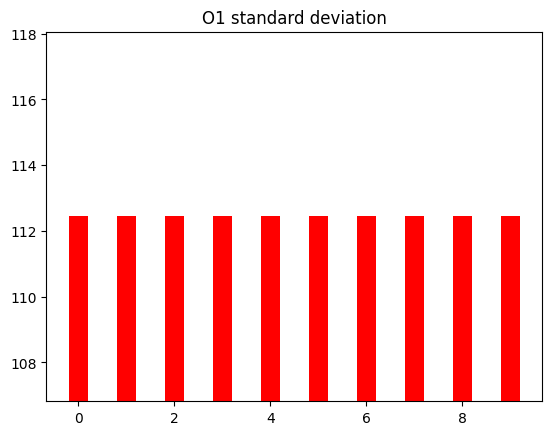

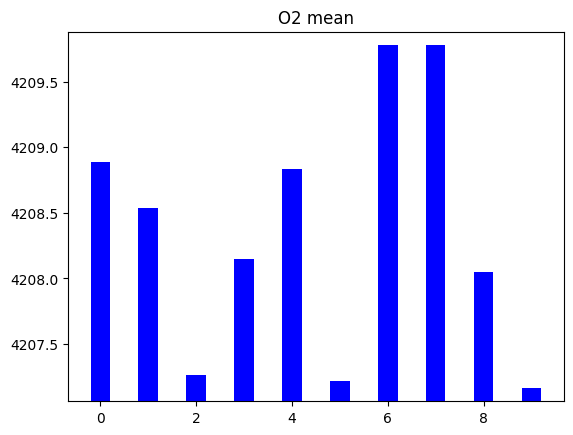

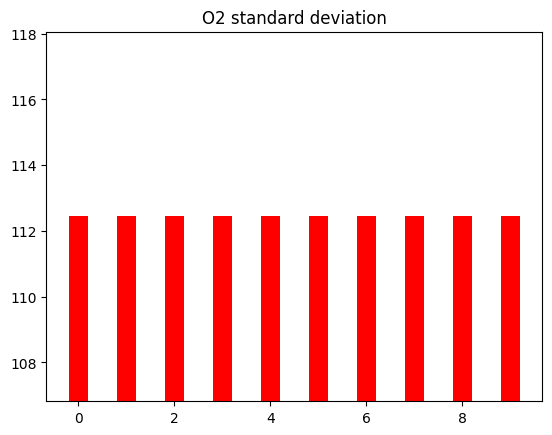

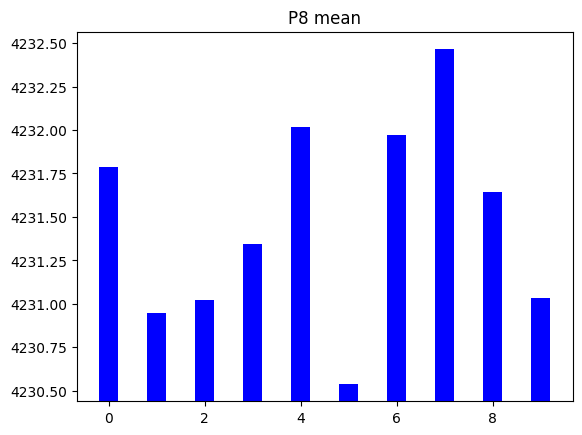

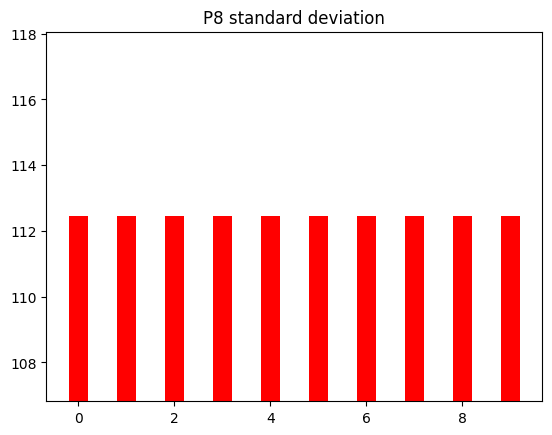

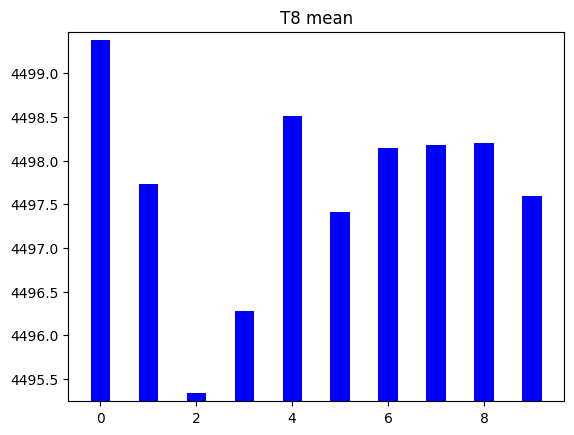

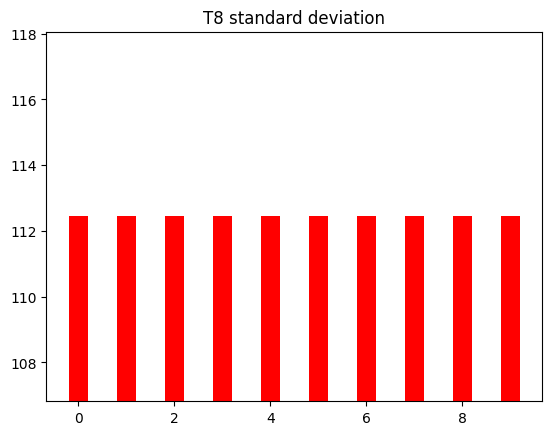

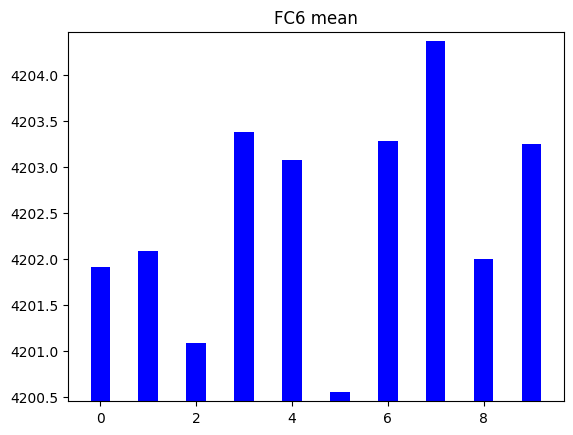

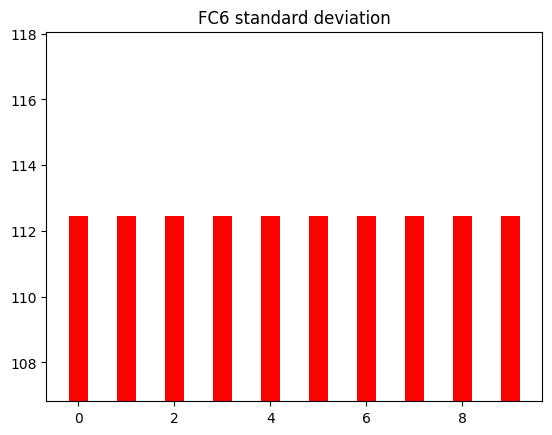

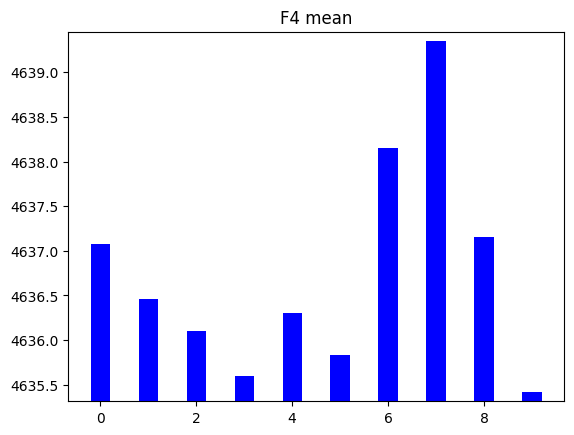

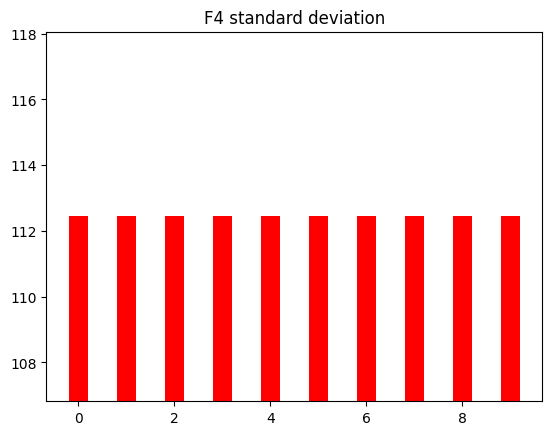

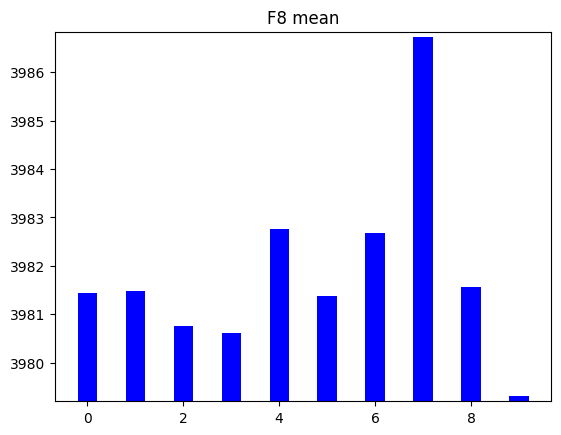

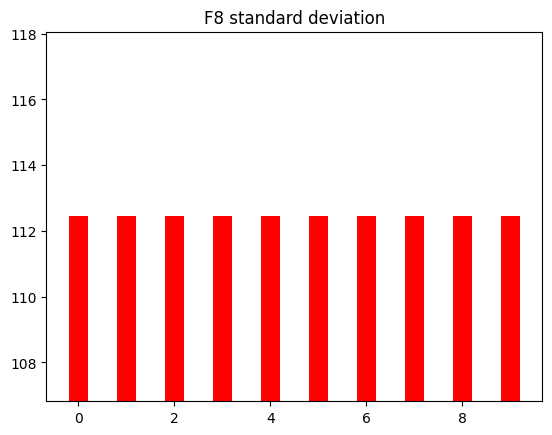

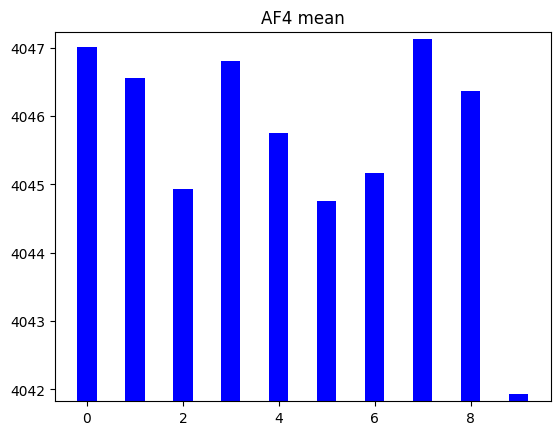

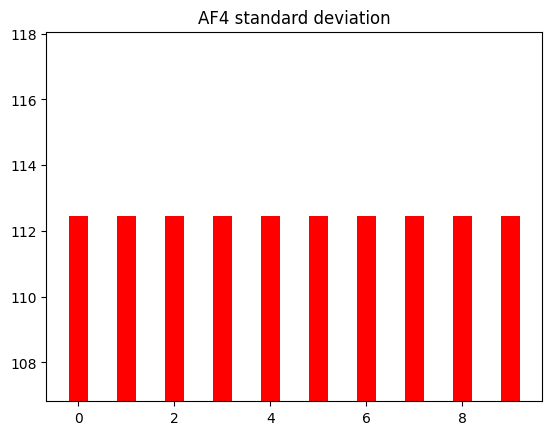

In [76]:
ch_mean_list = []
for i in range(0,14):
    l = []
    for n in range(0,10):
        l.append([])
    ch_mean_list.append(l)
    
ch_sd_list = []
for i in range(0,14):
    l = []
    for n in range(0,10):
        l.append([])
    ch_sd_list.append(l)

for c, ch in enumerate(ch_mean_list):
    for n, number in enumerate(ch):
        ch_mean_list[c][n].append(np.mean(num_list[n][c]))
        ch_std_list[c][n].append(np.std(num_list[n][c]))

nums = ['0','1','2','3','4','5','6','7','8','9']

for ch, channel in enumerate(ch_mean_list):
    averages = []
    for num in channel:
        averages.append(num[0])
    plt.bar(nums,averages, color='blue', width=0.4)
    plt.ylim(min(averages)-0.1, max(averages)+0.1)
    plt.title(ch_names[ch] + ' mean')
    plt.savefig('./graphs/' + ch_names[ch] + '_mean.png')
    plt.show()
    
    # deviations = []
    # for num in ch_std_list[ch]:
    #     deviations.append(num[0])
    # plt.bar(nums,deviations, color='red', width=0.4)
    # plt.ylim(min(deviations), max(deviations))
    # plt.title(ch_names[ch] + ' standard deviation')
    # plt.savefig('./graphs/' + ch_names[ch] + '_std.png')
    # plt.show()

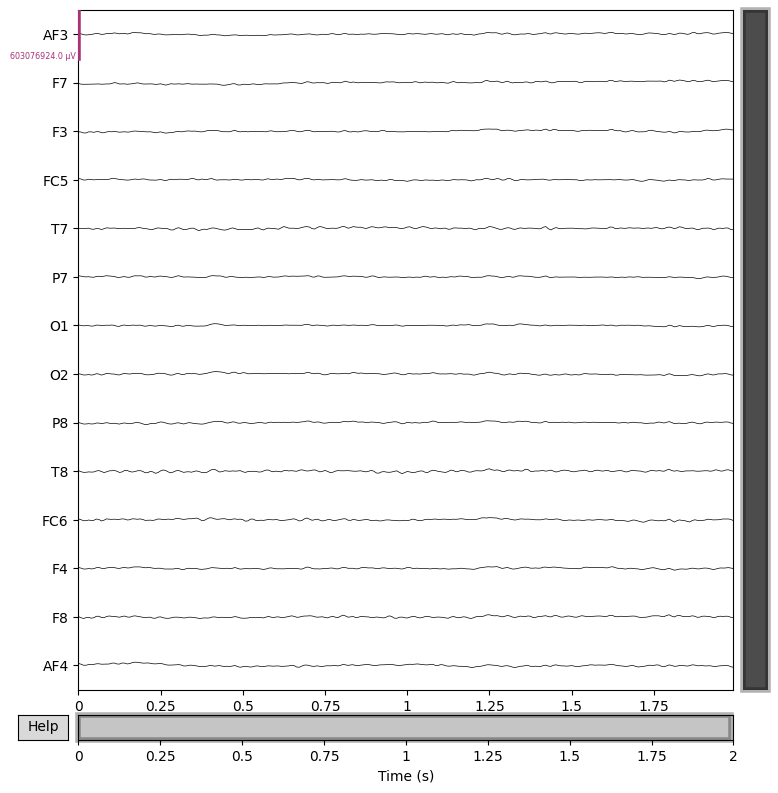

In [7]:
all_points[234].mne_object.plot(scalings = 'auto'); #Pre-cleaning

In [8]:
"""
We will loop through every data point and call the cleaning methods.
This filters the frequencies to be only between the ranges. We want 3 - 30 because this is where relevant alpha theta, beta bands lie.
MNE says to multiply the lowpass by 1/3.
"""
for point in tqdm(all_points):
    #T7, P7, P8, T8 have been shown to be the most involved in image recognition
    """point.crop_to_channels(['T7', 'P7', 'P8', 'T8'])
    point.average_reference()
    point.filter_mne(3, 30)"""
    point.full_clean(channels = ['T7', 'P7', 'P8', 'T8'], l_freq = 3, h_freq = 30)

100%|██████████| 64629/64629 [01:47<00:00, 603.32it/s]


In [ ]:
ch_names = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
mean_af_list = []
std_af_list = []
for i in range(0,14):
    mean_list.append([])
    std_list.append([])

for i, value in enumerate(tqdm(all_points)):
    for y, ch_value in enumerate(ch_names):
        mean_list[y].append(np.mean(all_points[i].mne_object.get_data()[y]))
        std_list[y].append(np.std(all_points[i].mne_object.get_data()[y]))

for i, value in enumerate(ch_names):
    print('mean '+ value + ' = ' + str(np.mean(mean_list[i])))
    print('std '+ value + ' = ' + str(np.std(std_list[i])) + '\n')
    
# sklearn has confidence intervals

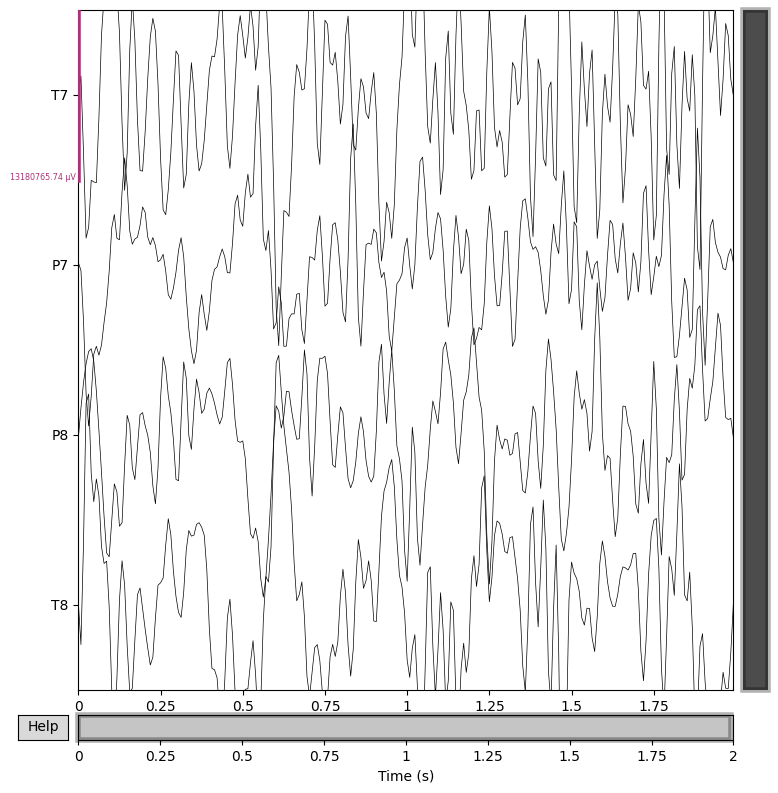

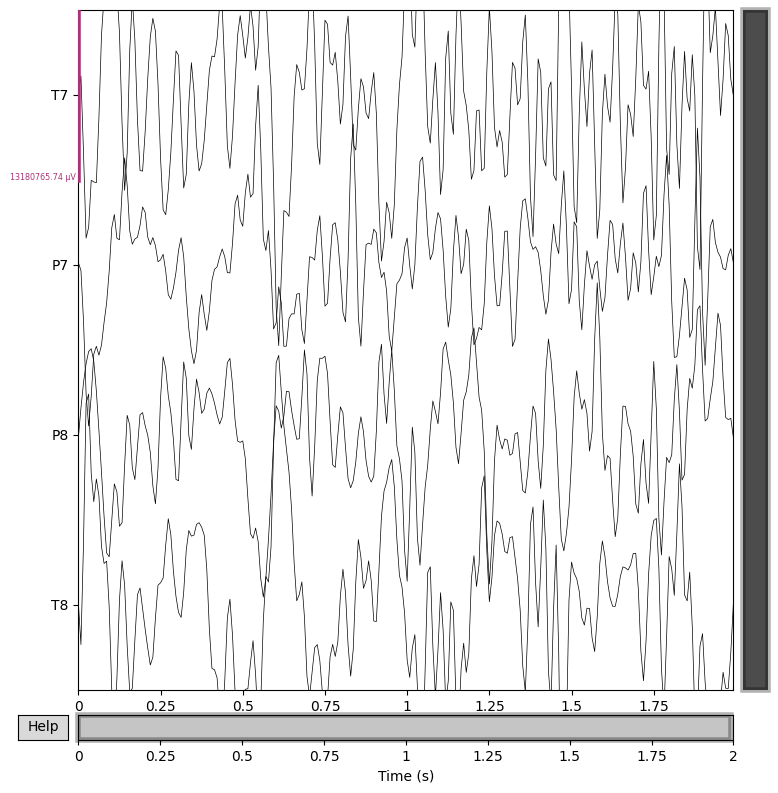

In [47]:
all_points[0].mne_object.plot(scalings='auto')

(1, 256)
(256,)


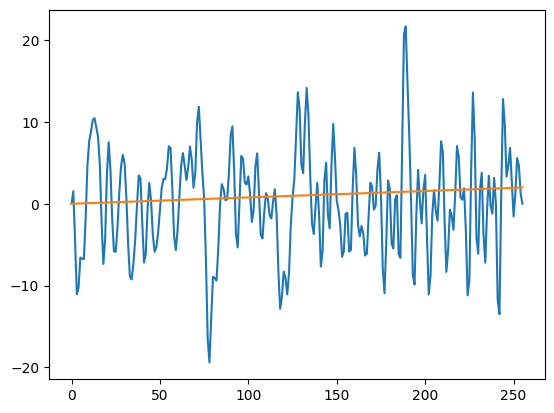

In [51]:
print(all_points[0].mne_object['T7'][0].shape)
print(all_points[0].mne_object['T7'][1].shape)
plt.plot(all_points[0].mne_object['T7'][0][0,0:256])
plt.plot(all_points[0].mne_object['T7'][1][0:256])


In [115]:
data_avg = np.empty([1,256])
line_avg = np.empty([256,])

print(line_avg.shape)


count = 0
for i in all_points:
    line_avg=np.add(line_avg,i.mne_object['T7'][1])
    data_avg=np.add(data_avg,i.mne_object['T7'][0])
    


#data_avg/=len(all_points[0].mne_object['T7'])
#line_avg/=len(all_points[0].mne_object['T7'])

#plt.plot(data_avg)
#plt.plot(line_avg)

(256,)


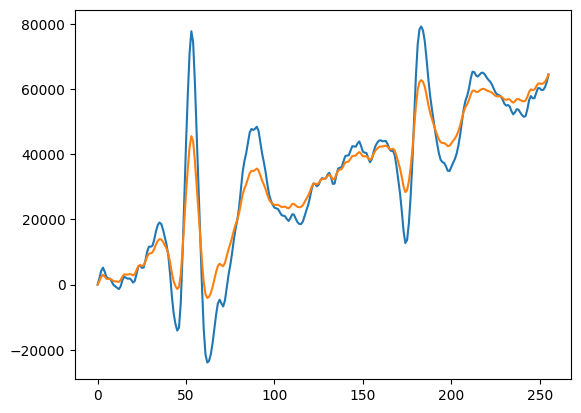

In [116]:
d_avg=np.divide(data_avg,len(all_points[0].mne_object['T7']))
l_avg=np.divide(line_avg,len(all_points[0].mne_object['T7']))
plt.plot(d_avg[0,0:256])
plt.plot(l_avg[0:256])